In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # For model saving


Decision Tree Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



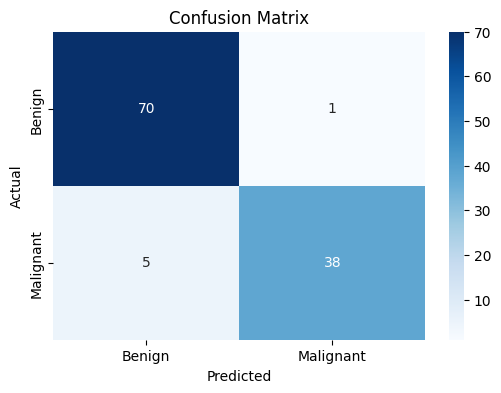

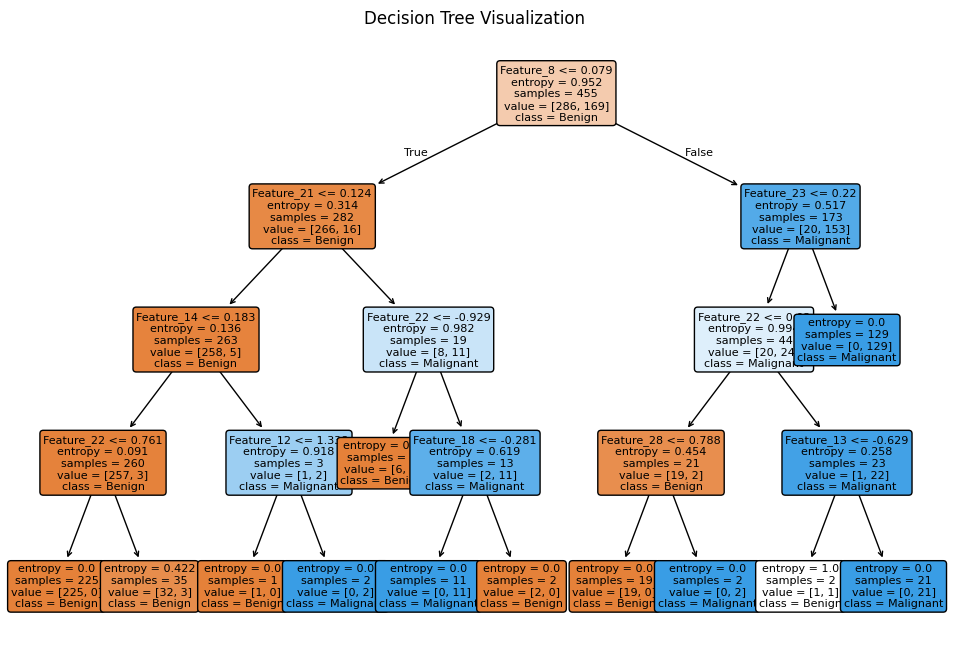

Model saved successfully!


In [2]:
# Dataset URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Define column names
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]

# Load dataset
df = pd.read_csv(url, names=columns)

# Drop the "ID" column as it's not needed
df.drop(columns=['ID'], inplace=True)

# Display first few rows
df.head()
# Encode Diagnosis (M → 1, B → 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Split features & target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)
# Predictions
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()
joblib.dump(dt_model, "decision_tree_model.pkl")
print("Model saved successfully!")
